## Observations and Insights 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = mouse_metadata.merge(study_results).sort_values('Tumor Volume (mm3)')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [68]:
# Checking the number of mice.
mouse_count = mouse_df['Mouse ID'].count()
mouse_count

1893

In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice = mouse_df.duplicated(['Mouse ID'], keep = 'first')
dupli_mice

9       False
19      False
8        True
18       True
7        True
        ...  
1571     True
1179     True
1354     True
1152     True
1277     True
Length: 1893, dtype: bool

In [70]:
# Optional: Get all the data for the duplicate mouse ID. 



In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_2 = mouse_df.drop_duplicates(subset=['Mouse ID'],keep='last')
mouse_df_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
938,h428,Ketapril,Female,1,27,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
752,d133,Zoniferol,Male,5,30,0,45.000000,0
1753,x336,Naftisol,Female,4,29,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [72]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_df_2['Mouse ID'].count()
mouse_count

249

## Summary Statistics

In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mouse_median = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
mouse_var = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
mouse_sd = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
mouse_sem = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
# Assemble the resulting series into a single summary dataframe.
mouse_stat = pd.concat([mouse_mean,mouse_median,mouse_var,mouse_sd,mouse_sem],axis=1)
mouse_stat = mouse_stat.set_axis(['Tumor Volume Mean','Tumor Volume Median','Tumor Volume Variance',
                                 'Tumor Volume Standard Deviation','Tumor Volume Standard Error of Mean'], axis=1)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [166]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stat
# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse = mouse_df_2.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean',
                                                                           'median',
                                                                           'var',
                                                                           'std',
                                                                           'sem']})
agg_mouse

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             46.119199  45.893720    1.019059   1.009485  0.201897
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.525392  60.165180   61.216264   7.824082  1.564816
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              45.678645  45.521875    0.587093   0.766220  0.153244
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

Ramicane     25
Infubinol    25
Ceftamin     25
Propriva     25
Naftisol     25
Capomulin    25
Zoniferol    25
Placebo      25
Ketapril     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

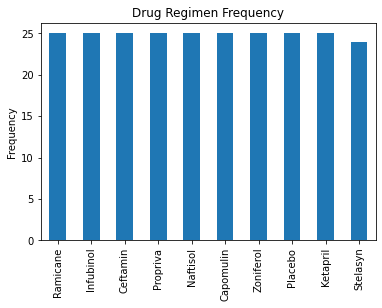

In [139]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = mouse_df_2['Drug Regimen'].value_counts()
drug_regimen = drug_count.plot(kind='bar',title='Drug Regimen Frequency')
drug_regimen.set_ylabel('Frequency')

drug_count

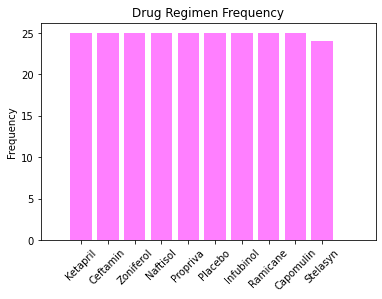

Ramicane     25
Infubinol    25
Ceftamin     25
Propriva     25
Naftisol     25
Capomulin    25
Zoniferol    25
Placebo      25
Ketapril     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [124]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = mouse_df_2['Drug Regimen'].unique()
drug_count = mouse_df_2['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_count))
plt.bar(x_axis,drug_count, color = 'fuchsia', alpha=0.5, align='center')

ticks = [v for v in x_axis]
plt.xticks(ticks, drug_names,rotation = 45)
plt.ylabel('Frequency')
plt.title('Drug Regimen Frequency')
plt.xlim(-1.5,len(x_axis)+1)
plt.show()

drug_count

Male      125
Female    124
Name: Sex, dtype: int64

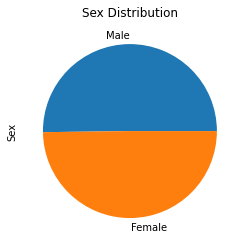

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gen = mouse_df_2['Sex'].value_counts()
mouse_gen_pie = mouse_gen.plot(kind='pie', title='Sex Distribution')

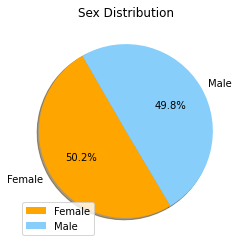

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
sizes = mouse_gen
colors = ['orange','lightskyblue']

plt.pie(sizes,labels=labels,colors=colors,shadow=True,startangle=120,
        autopct="%1.1f%%")
plt.title('Sex Distribution')
plt.legend(labels,loc=3)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
